# Italy Airports - Performance Analysis

### Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal wants you to

   - determine the industry factors that are most important in predicting the salary amounts for these data.

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries.

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer this question.

---

### Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to address the question above.

In [86]:
import pandas as pd
import numpy as np
import warnings
import glob
import os

from bs4 import BeautifulSoup
import requests
from tqdm import tqdm
import re

from time import time, sleep

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set(font_scale=0.8)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

In [4]:
# run to avoid warnings
warnings.filterwarnings('ignore')

In [5]:
options = webdriver.ChromeOptions() ;
prefs = {"download.default_directory" : "D:\Federico\02_Projects\01_Data_Science\05_Italian_Airports\datasets"};
options.add_experimental_option("prefs",prefs);

In [6]:
URL_example = "https://assaeroporti.com/wp-content/plugins/multipage_xls_reader/excel_file/2019_12.xls"

In [15]:
# download old monthly datasets
dr = webdriver.Chrome()
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

for year in range(2000, 2024):

    for month in months:
            
        URL = f'https://assaeroporti.com/wp-content/plugins/multipage_xls_reader/excel_file/{year}_{month}.xls'
        
        dr.get(URL)
        
        sleep(2)
        
dr.quit()

Dataset for June 2001 is missing.

In [18]:
def extract_data(file_path, sheet_name, column_names):
    """Extracts data from a specified sheet and columns in an Excel file.

    Args:
        file_path (str): The path to the Excel file.
        sheet_name (str): The name of the sheet to extract data from.
        column_names (list): A list of column names to extract.

    Returns:
        pandas.DataFrame: A DataFrame containing the extracted data.
    """

    try:
        df = pd.read_excel(file_path=file_paths, sheet_name=sheet_names, usecols=column_names)
        return df
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

def combine_data(file_paths, sheet_names, column_names, output_file="combined_data.xlsx"):
    """Combines data from multiple Excel files into a single DataFrame and saves it to a new file.

    Args:
        file_paths (list): A list of paths to the Excel files.
        sheet_names (list): A list of sheet names for each file.
        column_names (list): A list of column names to extract.
        output_file (str, optional): The name of the output Excel file. Defaults to "combined_data.xlsx".
    """

    dataframes = []
    for file_path, sheet_name in zip(file_paths, sheet_names):
        df = extract_data(file_path, sheet_name, column_names)
        if df is not None:
            dataframes.append(df)

    if len(dataframes) > 0:
        combined_df = pd.concat(dataframes, ignore_index=True)

        # Handle potential duplicate column names
        combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]

        combined_df.to_excel(output_file, index=False)
        print(f"Combined data saved to {output_file}")
    else:
        print("No data was extracted.")

### Example usage

# file_paths = ["file1.xlsx", "file2.xlsx", "file3.xlsx"]
# sheet_names = ["Sheet1", "Sheet2", "Sheet3"]
# column_names = ["Column A", "Column B", "Column C"]

# combine_data(file_paths, sheet_names, column_names)

In [19]:
file_paths = ['datasets/original/2000_01.xls']
sheets_names = ['Movimenti Gennaio', 'Passeggeri Gennaio', 'Cargo Gennaio']
column_names = ['C', 'E', 'G', 'K']

In [20]:
combine_data(file_paths, sheet_names, column_names)

Error processing datasets/original/2000_01.xls: read_excel() got an unexpected keyword argument 'file_path'
No data was extracted.


In [33]:
months_names = ['Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno',
                'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre']


In [63]:
# define the Excel worksheets to access
sheets_list = [5, 6, 7]              # Movimenti [mese], Passeggeri [mese], Cargo [mese]

# define the columns to extract for each worksheet
columns_list_00 = [1, 2, 4, 6, 10]   # B, C, E, G, K
columns_list_01 = [2, 4, 6, 8, 12]   # C, E, G, I, M
columns_list_02 = [2, 4, 8]          # C, E, I

# These columns numbers are working for files from January 2000 until NOW

In [135]:
excel_try = 'datasets/original/2000_01.xls'

In [136]:
df_MOV = pd.read_excel(excel_try, sheet_name=sheets_list[0], usecols=columns_list_00)
df_PAX = pd.read_excel(excel_try, sheet_name=sheets_list[1], usecols=columns_list_01)
df_FRE = pd.read_excel(excel_try, sheet_name=sheets_list[2], usecols=columns_list_02)


In [137]:
df_MOV

,Movimenti del mese,Gennaio 2000 (su base1999),Unnamed: 4,Unnamed: 6,Unnamed: 10
0,Aeroporto,Nazionali,Internazionali,di cui C. Europea,Aviazione Generale
1,Alghero,515,25,0,0
2,Ancona,476,346,182,574
3,Bari,1437,77,0,355
4,Bergamo,770,2302,1543,216
5,Bologna,1379,3108,2576,239
6,Bolzano,98,128,128,0
7,Brescia,152,34,32,70
8,Brindisi,502,22,0,107
9,Cagliari,1691,146,103,183


In [138]:
df_PAX

,Gennaio 2000 (su base1999),Unnamed: 4,Unnamed: 6,Unnamed: 8,Unnamed: 12
0,Nazionali,Internazionali,di cui C. Europea,Transito,Aviazione Generale
1,30634,799,0,0,0
2,18183,12098,7056,61,656
3,82936,1217,0,68,110
4,38403,48697,25666,653,189
5,67923,150338,120214,5424,307
6,2031,1298,1298,0,0
7,2584,3411,3234,0,93
8,34360,12,0,73,20
9,122856,4968,2173,4251,97


In [139]:
df_FRE

,Gennaio 2000 (su base1999),Unnamed: 4,Unnamed: 8
0,Merci Avio,Merci Superficie,Posta
1,59,0,74
2,232,2,68
3,168,0,193
4,7139,80,1
5,945,422,255
6,0,0,0
7,0,0,0
8,17,0,5
9,235,0,182


In [140]:
# merge the three worksheets
df_try = pd.concat([df_MOV, df_PAX, df_FRE], axis=1)

In [141]:
# assign column names
df_try.columns = ['Airport', 'MOV - Domestic', 'MOV - International', 'MOV - EU', 'MOV - General Avio',
                  'PAX - Domestic', 'PAX - International', 'PAX - EU', 'PAX - Transit', 'PAX - General Avio',
                  'FRE - Goods Avio', 'FRE - Goods Ground', 'FRE - Mail']

In [142]:
# remove first and last row
df_try = df_try.iloc[1:-1]

In [143]:
# add a date column which includes year and month
df_try['Date']=excel_try
df_try['Date']=df_try['Date'].str.replace('\D', '', regex=True)
df_try['Date']=df_try['Date'].astype(str).str[:4] + '/' + df_try['Date'].astype(str).str[4:]

In [144]:
df_try

,Airport,MOV - Domestic,MOV - International,MOV - EU,MOV - General Avio,PAX - Domestic,PAX - International,PAX - EU,PAX - Transit,PAX - General Avio,FRE - Goods Avio,FRE - Goods Ground,FRE - Mail,Date
1,Alghero,515,25,0,0,30634,799,0,0,0,59,0,74,2000/01
2,Ancona,476,346,182,574,18183,12098,7056,61,656,232,2,68,2000/01
3,Bari,1437,77,0,355,82936,1217,0,68,110,168,0,193,2000/01
4,Bergamo,770,2302,1543,216,38403,48697,25666,653,189,7139,80,1,2000/01
5,Bologna,1379,3108,2576,239,67923,150338,120214,5424,307,945,422,255,2000/01
6,Bolzano,98,128,128,0,2031,1298,1298,0,0,0,0,0,2000/01
7,Brescia,152,34,32,70,2584,3411,3234,0,93,0,0,0,2000/01
8,Brindisi,502,22,0,107,34360,12,0,73,20,17,0,5,2000/01
9,Cagliari,1691,146,103,183,122856,4968,2173,4251,97,235,0,182,2000/01
10,Catania,3020,358,234,79,212833,28701,20910,104,38,547,12,364,2000/01


In [145]:
df_try.shape

(35, 14)

In [146]:
# save the test dataframe as CSV
df_try.to_csv('datasets/mod/df_try.csv')

In [132]:
# Saving the scraping results as CSV
# results.to_csv('datasets/scrape/results_scrape.csv', encoding='utf-8', index=False)

In [4]:
# Loading the data from CSV for consistency reasons
results_m = pd.read_csv('datasets/scrape/results_scrape.csv')

In [5]:
results_m.head(17)

,index,job_title,company_name,company_rating,company_location,salary_amount,salary_estimate,multi_candidate,job_snippet
0,0,Student Research Assistant,University of New Mexico,4.0,"Albuquerque, NM 87106 (University Hts area)",$16 an hour,Not Available,Not Available,Informatics. Approaches include machine learni...
1,1,Data Scientist Manager,Deloitte,3.9,"Albuquerque, NM 87102 (Downtown area)",Not Available,Estimated $178K - $225K a year,Not Available,Expert understanding of Python and other commo...
2,2,"Data Scientist, Senior",Booz Allen Hamilton,3.9,"Remote in Kirtland AFB, NM",Not Available,Estimated $95.2K - $121K a year,Not Available,"Experience with natural language processing, s..."
3,3,Solution Architecture Manager,Deloitte,3.9,"Albuquerque, NM 87102 (Downtown area)",Not Available,Estimated $179K - $227K a year,Not Available,"One or more programming languages (i.e. C#, Ja..."
4,4,"Manager, Cognitive and AI - Remote",KPMG,3.9,"Remote in Albuquerque, NM 87110",Not Available,Estimated $122K - $154K a year,Not Available,Manage all Cognitive projects and Cognitive an...
5,5,Software Engineer (JR),Alaka`ina Foundation Family of Companies,3.3,"Kirtland AFB, NM",Not Available,Estimated $102K - $129K a year,Not Available,The successful candidate will have experience ...
6,6,Data Science Manager,Alaka`ina Foundation Family of Companies,3.3,"Kirtland AFB, NM",Not Available,Estimated $120K - $152K a year,Not Available,The successful candidate will be experienced w...
7,7,"Software Engineer, Manager - Tax Analysis & De...",Deloitte,3.9,"Albuquerque, NM 87102 (Downtown area)",Not Available,Estimated $150K - $190K a year,Not Available,Experience working with one or more from the f...
8,8,"Lead Software Engineer, Tax Analysis & Debt In...",Deloitte,3.9,"Albuquerque, NM 87102 (Downtown area)",Not Available,Estimated $129K - $163K a year,Not Available,Experience working with one or more from the f...
9,9,Sr. Software Engineer,Alaka`ina Foundation Family of Companies,3.3,"Kirtland AFB, NM",Not Available,Estimated $106K - $135K a year,Not Available,The successful candidate will have experience ...


#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary.

In [69]:
def clean_salary(salary):
    if 'month' in salary:
        salary = salary.replace(',', '')
        salary = re.findall(r'\d+', salary)
        salary = [int(i) for i in salary]
        salary = sum(salary) / len(salary)
        salary = salary * 12
    else:
        salary = salary.replace(',', '')
        salary = re.findall(r'\d+', salary)
        salary = [int(i) for i in salary]
        salary = sum(salary) / len(salary)
    return salary

In [70]:
# Testing the function. It works
print(clean_salary('$130,000 - $180,000 a year'))
print(clean_salary('$130,000 - $180,000 a month'))
print(clean_salary('$220,000 a year'))
print(clean_salary('$220,000 a month'))

155000.0
1860000.0
220000.0
2640000.0


In [71]:
# Applying the function to the salary column
us_fin['salary_amount'] = us_fin['salary_amount'].map(clean_salary)

In [72]:
us_fin

,job_title,company_location,salary_amount
0,"Senior Software Engineer, Backend (Speech to T...",NM,190000.0
1,Senior / Staff NLP Engineer (Speech to Text St...,NM,210000.0
2,Senior Data Engineer,NM,175000.0
3,Principal Data Engineer (Pre-IPO),NM,175000.0
4,Senior Machine Learning Engineer,NM,175000.0
...,...,...,...
12153,"Sr. Product Manager, Talent & Culture Portfolio",PA,118680.0
12154,Distinguished Solution Train Engineer (US),NJ,172380.0
12155,Construction Projects Manager I,PA,55739.0
12156,School Nurse - Camden,NJ,71500.0


### Save your results as a CSV

In [498]:
us_fin.to_csv('datasets/final/us_fin.csv', encoding='utf-8', index=False)

### Load in the the data of scraped salaries

In [85]:
df = pd.read_csv('datasets/final/us_fin.csv')

### Performing EDA  
A short quantitative description and visualisation of the data.  
  
  ***

In [92]:
df.describe(include='all')

,job_title,company_location,salary_amount
count,12158,12091,12158.000000
unique,8237,31,NaN
top,Senior Software Engineer,NY,NaN
freq,149,1794,NaN
mean,NaN,NaN,118876.890648
std,NaN,NaN,48635.401749
min,NaN,NaN,29.000000
25%,NaN,NaN,83267.000000
50%,NaN,NaN,114252.250000
75%,NaN,NaN,150000.000000


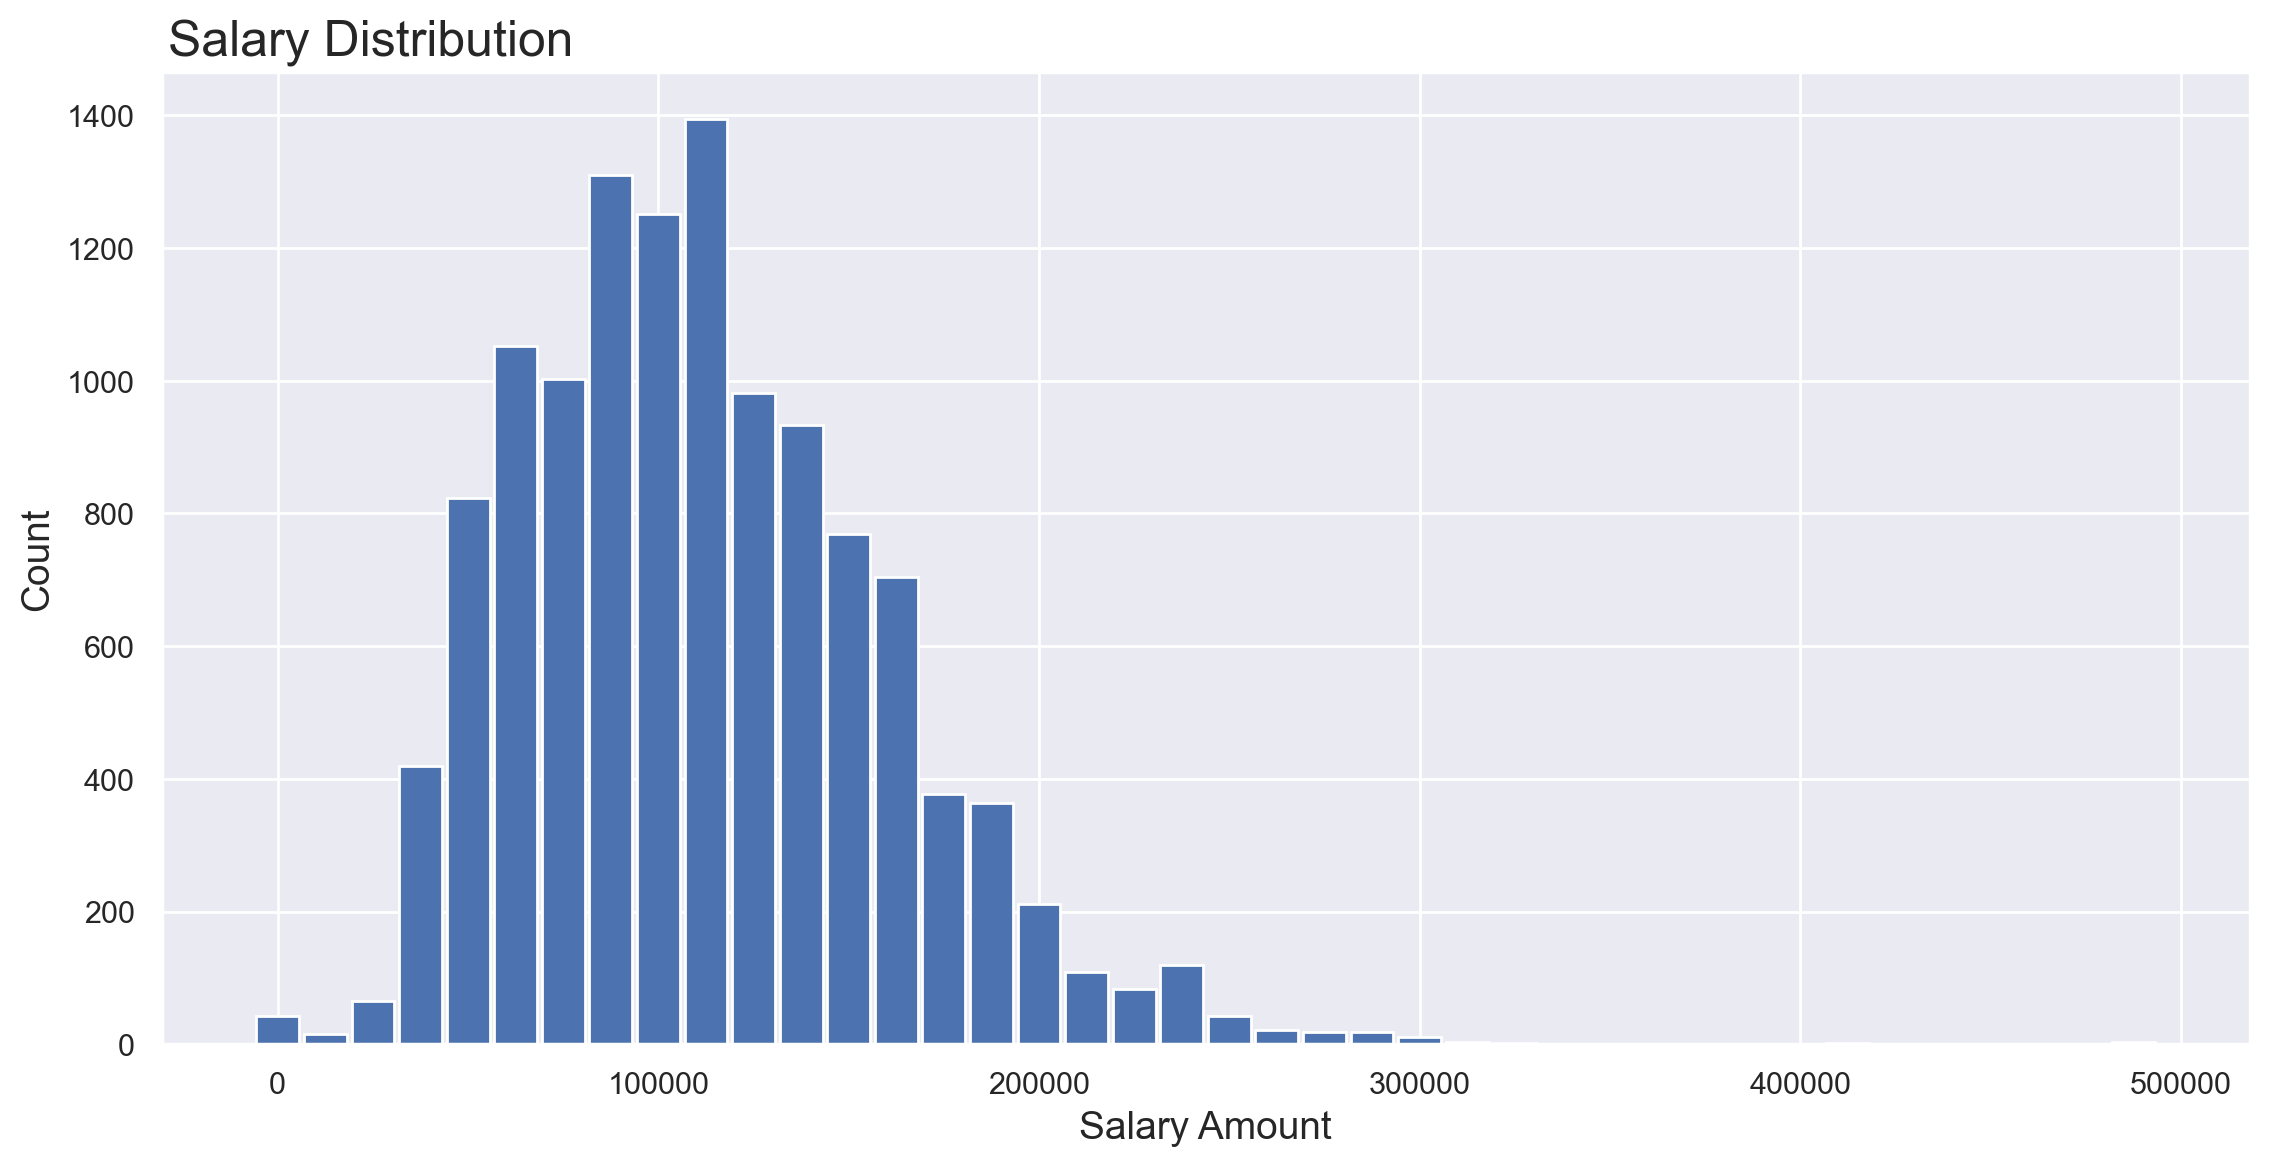

In [122]:
plt.figure(figsize=(12,6))
plt.hist(df.salary_amount, bins= 40, align='left', rwidth=0.9)
plt.title('Salary Distribution', x = 0.1, fontsize = 18)
plt.xlabel('Salary Amount', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

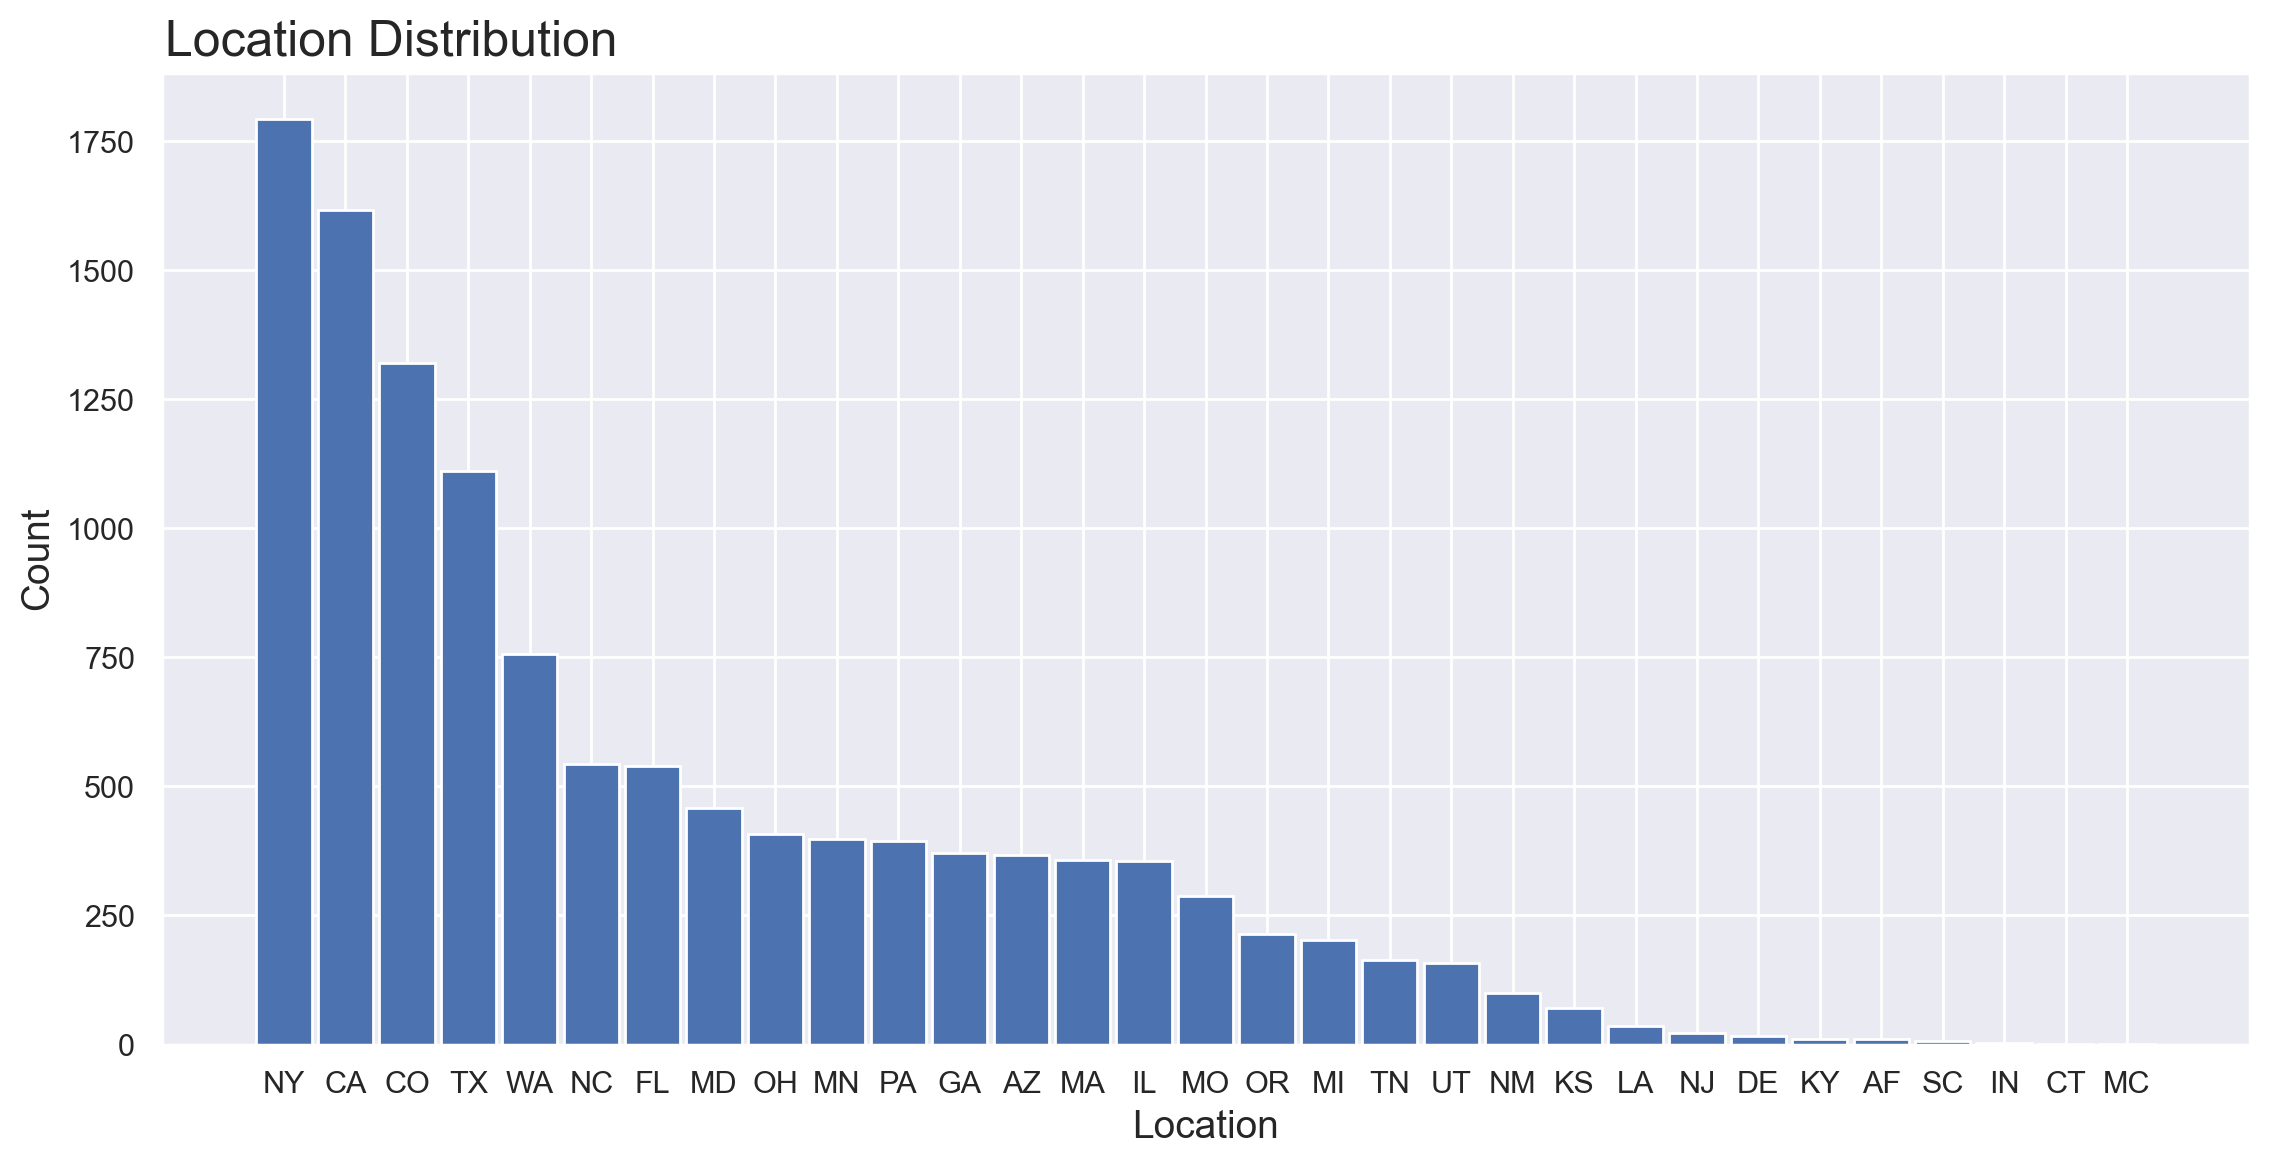

In [137]:
locs = df.company_location.value_counts().index
locs_counts = df.company_location.value_counts().values

plt.figure(figsize=(12,6))
plt.bar(locs, locs_counts, width=0.9)
plt.title('Location Distribution', x = 0.11, fontsize = 18)
plt.xlabel('Location', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median).

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries.

In [74]:
median = df.salary_amount.median()
print(median)

114252.25


In [75]:
def high_salary(row):
    median = df.salary_amount.median()
    if row['salary_amount'] >= median:
        return 1
    else:
        return 0

### Create a classification model to predict High/Low salary. 


- Start by ONLY using the location as a feature.
- Use at least two different classifiers you find suitable.
- Remember that scaling your features might be necessary.
- Display the coefficients/feature importances and write a short summary of what they mean.
- Create a few new variables in your dataframe to represent interesting features of a job title (e.g. whether 'Senior' or 'Manager' is in the title).
- Incorporate other text features from the title or summary that you believe will predict the salary.
- Then build new classification models including also those features. Do they add any value?
- Tune your models by testing parameter ranges, regularization strengths, etc. Discuss how that affects your models.
- Discuss model coefficients or feature importances as applicable.

In [524]:
# Saving the modified dataframe as CSV
df.to_csv('datasets/df.csv', encoding='utf-8', index=False)

In [142]:
# Loading the data from CSV for consistency reasons
df = pd.read_csv('datasets/df.csv')

In [147]:
# Using only location as feature
df_dum = pd.get_dummies(df, columns=['company_location'], drop_first=True)
df_dum.drop(columns=['job_title', 'salary_amount'], inplace=True)
df_dum.head()

,high_salary,company_location_AZ,company_location_CA,company_location_CO,company_location_CT,company_location_DE,company_location_FL,company_location_GA,company_location_IL,company_location_IN,...,company_location_NM,company_location_NY,company_location_OH,company_location_OR,company_location_PA,company_location_SC,company_location_TN,company_location_TX,company_location_UT,company_location_WA
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
